In this first notebook, we will go from the installation of the [Brian](http://briansimulator.org/) neural simulator to the display of the simulation of an Hodgkin-Huxley neuron.

# Installation of PyNN

In [1]:
!python3 -m pip install -U PyNN

Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x110cf9ac8>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /simple/pynn/
Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x110cf9a58>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /simple/pynn/
Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x110cf9668>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known')': /simple/pynn/
Retrying (Retry(total=1, connect=None, read=No

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
fig_width = 15
phi = (np.sqrt(5)+1)/2

# A selection of Izhikevich neurons

adapted from http://neuralensemble.org/docs/PyNN/examples/Izhikevich.html

Configure the simulator

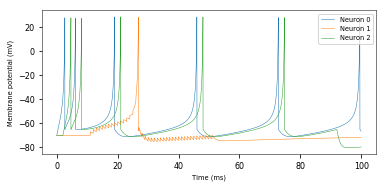

In [29]:
import pyNN.nest as sim
sim.setup(timestep=0.01, min_delay=1.0)


# === Build and instrument the network =======================================

neurons = sim.Population(3, sim.Izhikevich(a=0.02, b=0.2, c=-65, d=6, i_offset=[0.014, 0.0, 0.0]))
spike_source = sim.Population(1, sim.SpikeSourceArray(spike_times=arange(10.0, 51, 1)))

connection = sim.Projection(spike_source, neurons[1:2], sim.OneToOneConnector(),
                            sim.StaticSynapse(weight=3.0, delay=1.0),
                            receptor_type='excitatory'),

electrode = sim.DCSource(start=2.0, stop=92.0, amplitude=0.014)
electrode.inject_into(neurons[2:3])

neurons.record(['v'])  # , 'u'])
neurons.initialize(v=-70.0, u=-14.0)


# === Run the simulation =====================================================

sim.run(100.0)


# === Save the results, optionally plot a figure =============================

from pyNN.utility.plotting import Figure, Panel
data = neurons.get_data().segments[0]
v = data.filter(name="v")[0]
#u = data.filter(name="u")[0]
fig = Figure(
    Panel(v, ylabel="Membrane potential (mV)", xticks=True,
          xlabel="Time (ms)", yticks=True),
    #Panel(u, ylabel="u variable (units?)"),    
)
# === Clean up and quit ========================================================

sim.end()